a mail box file (with extension `.mbox`) contains emails stored as plain text. 

**Reading mbox file in python**

In [10]:
%matplotlib inline
import mailbox
from matplotlib import pyplot as plt
import os

In [7]:
mbox = mailbox.mbox('email1.mbox')
#for message in mbox:
    #print(message["date"])
    #print(message.items())
    # print(message['from']+" -->  "+message["to"])

### Analzying the file


In [8]:
def extractEmail(str):
    parts = str.split("<")
    email = str
    if(len(parts)==2):
        email = parts[1][0:len(parts[1])-1]
    return email

def analyze(mboxfile,options={}) :
    mbox = mailbox.mbox(mboxfile)
    myEmail = options["myEmail"]
    vals = {}
    vals["total"] = {"sent":0,"recieved":0,"sum":0}
    vals["sendTo"] = {}
    vals["recievedFrom"] = {}
    for message in mbox:
        fromEmail = extractEmail(message["from"])  
        if fromEmail==myEmail:
            # user has sent the email 
            vals["total"]["sent"]= vals["total"]["sent"]+1

            if fromEmail not in vals["sendTo"] :
                vals["sendTo"][message["to"]] = []
            info = message["date"]  

            vals["sendTo"][message["to"]].append(info)
        else:
            # user has recieved the email
            vals["total"]["recieved"]= vals["total"]["recieved"]+1

            if fromEmail not in vals["recievedFrom"] :
                vals["recievedFrom"][fromEmail] = []
            info = message["date"]  

            vals["recievedFrom"][fromEmail].append(info)
    vals["total"]["sum"] = vals["total"]["sent"]+vals["total"]["recieved"]
    return vals
    

In [11]:
stats = analyze('email1.mbox',{"myEmail":os.getenv('MY_EMAIL')})
print(stats)

{'total': {'sent': 0, 'recieved': 49, 'sum': 49}, 'sendTo': {}, 'recievedFrom': {'no-reply@dropboxmail.com': ['Tue, 3 Nov 2020 16:12:10 +0000'], 'CloudPlatform-noreply@google.com': ['Mon, 21 Sep 2020 10:47:40 -0700', 'Thu, 01 Oct 2020 15:34:37 -0700', 'Fri, 20 Nov 2020 02:11:05 -0800', 'Thu, 03 Dec 2020 13:07:23 -0800', 'Wed, 04 Nov 2020 18:40:17 -0800', 'Thu, 01 Oct 2020 13:39:55 -0700', 'Fri, 02 Oct 2020 19:55:22 -0700', 'Mon, 21 Dec 2020 02:11:37 -0800', 'Sun, 04 Oct 2020 19:55:28 -0700', 'Wed, 11 Nov 2020 18:40:34 -0800', 'Sun, 04 Oct 2020 13:40:02 -0700', 'Sat, 03 Oct 2020 13:39:57 -0700', 'Wed, 07 Oct 2020 13:41:09 -0700', 'Thu, 10 Dec 2020 09:52:37 -0800', 'Mon, 05 Oct 2020 13:40:08 -0700', 'Mon, 26 Oct 2020 15:18:26 -0700', 'Wed, 18 Nov 2020 18:34:44 -0800', 'Sun, 13 Dec 2020 02:09:32 -0800', 'Fri, 09 Oct 2020 13:41:12 -0700', 'Mon, 21 Dec 2020 02:24:11 -0800', 'Wed, 30 Sep 2020 19:55:15 -0700'], 'no-reply@dropbox.com': ['Tue, 3 Nov 2020 16:13:55 +0000', 'Thu, 28 Jan 2021 22:39

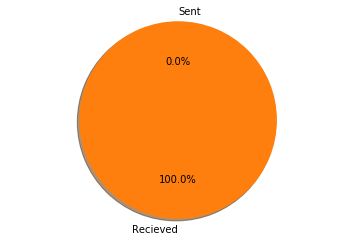

In [15]:
labels = 'Sent', 'Recieved'
sizes = [stats["total"]["sent"], stats["total"]["recieved"]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()